# 0. Cargar y mostrar las imagenes a color

In [ ]:
import cv2
import matplotlib.pyplot as plt


# Cargar las imagenes en color
imagenes = ['../image/1.png', '../image/2.png', '../image/3.png', '../image/4.png']

for i in range(len(imagenes)):

        
    # Cargar la imagen en color (por defecto cv2.imread carga en BGR)
    imagen_color = cv2.imread(imagenes[i], cv2.IMREAD_COLOR)



    # Como Matplotlib espera RGB, convertimos de BGR a RGB
    imagen_rgb = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)

    # Mostrar con Matplotlib
    plt.imshow(imagen_rgb)
    plt.title("Imagen a color")
    plt.axis("off")
    plt.show()


# 1. Operaciones morfologicas

Imagen 1:
Áreas de los objetos detectados: [8687.0, 2488.0]
Perímetros de los objetos detectados: [486.5929262638092, 195.68123936653137]
--------------------------------------------------


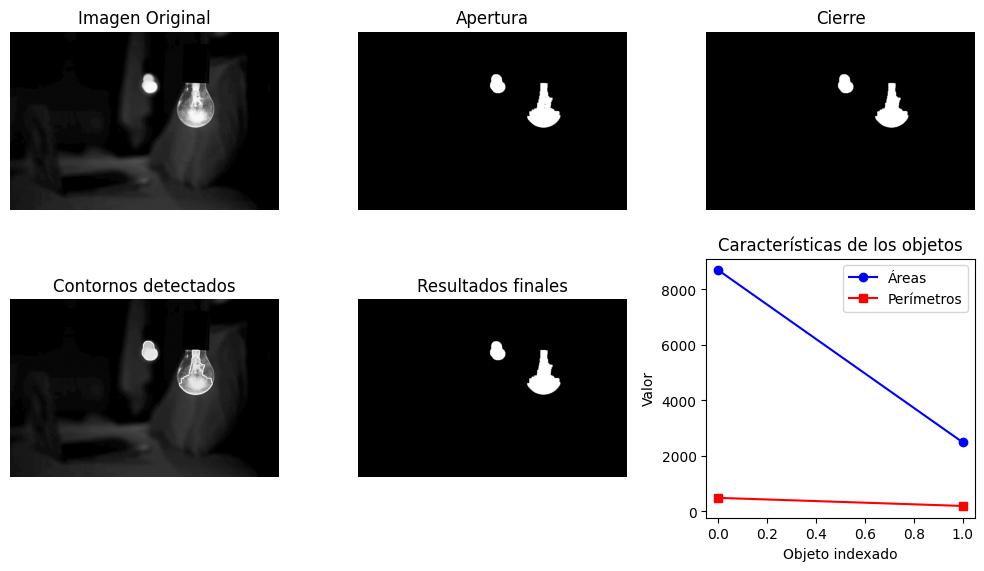

Valores de píxel en (100,200) - Imagen 1:
Original: 28
Apertura: 0
Cierre: 0
Imagen 2:
Áreas de los objetos detectados: [101.0, 36.0, 171.5, 49.0, 5356.0, 42.0, 12372.5, 62052.0, 155.5, 126.5, 42.0, 184.0, 36.0, 1884.5, 256.5, 601.5, 3109.5, 104.5]
Perímetros de los objetos detectados: [41.65685415267944, 24.0, 70.24264061450958, 28.0, 622.818322300911, 26.0, 612.0903997421265, 1937.9797900915146, 57.41421353816986, 46.38477575778961, 26.0, 67.31370830535889, 24.0, 285.58073353767395, 62.72792184352875, 160.87005710601807, 629.3797236680984, 42.24264061450958]
--------------------------------------------------


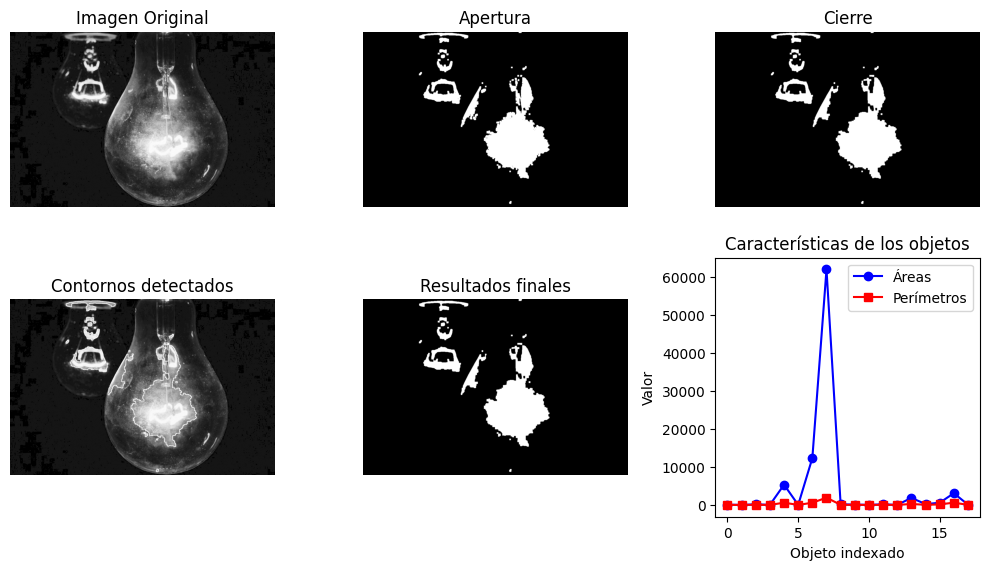

Valores de píxel en (100,200) - Imagen 2:
Original: 21
Apertura: 0
Cierre: 0
Imagen 3:
Áreas de los objetos detectados: [8002.5, 971.0, 173571.0, 38109.0]
Perímetros de los objetos detectados: [711.17871260643, 142.9116872549057, 4511.6937601566315, 1225.7543938159943]
--------------------------------------------------


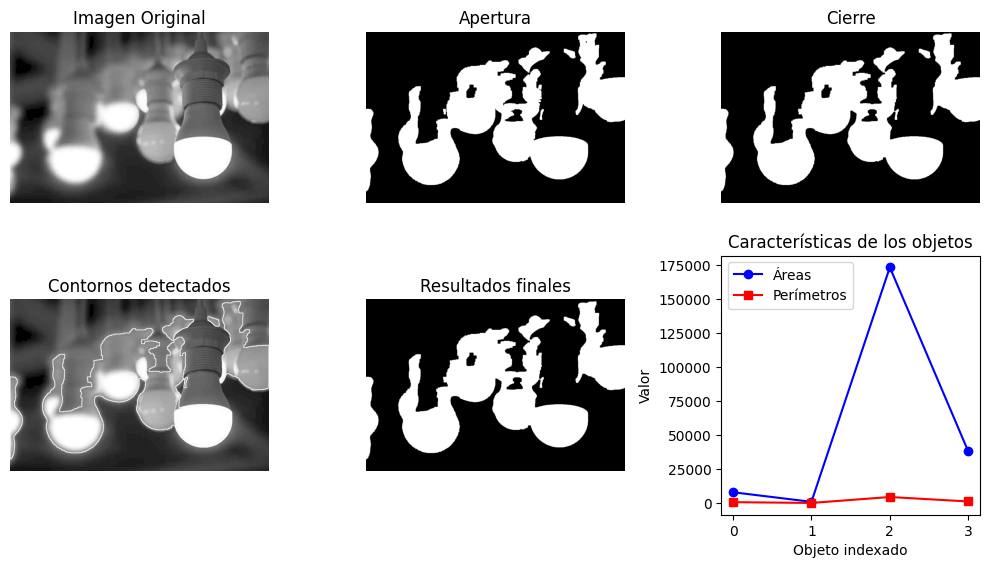

Valores de píxel en (100,200) - Imagen 3:
Original: 96
Apertura: 0
Cierre: 0
Imagen 4:
Áreas de los objetos detectados: [160.0, 704.5, 12579.5, 191242.5]
Perímetros de los objetos detectados: [55.65685415267944, 115.21320295333862, 498.0071402788162, 4099.0104377269745]
--------------------------------------------------


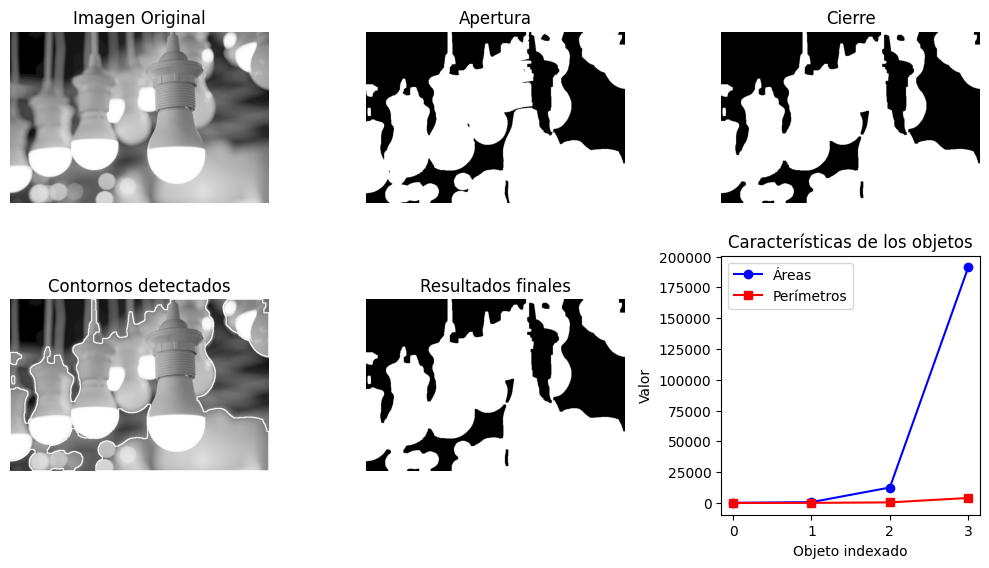

Valores de píxel en (100,200) - Imagen 4:
Original: 112
Apertura: 0
Cierre: 0


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lista de imágenes a procesar
imagenes = ['../image/1.png', '../image/2.png', '../image/3.png', '../image/4.png']

# Crear un kernel para las operaciones morfológicas
kernel = np.ones((7, 7), np.uint8)

for i in range(len(imagenes)):
    # Cargar la imagen en escala de grises
    image = cv2.imread(imagenes[i], cv2.IMREAD_GRAYSCALE)
    
    # Mostrar la imagen original
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Imagen Original')
    plt.axis('off')

    # Preprocesamiento: convertir la imagen a binaria usando umbralización
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Operaciones morfológicas
    # Apertura: elimina el ruido (elimina pequeñas manchas en el fondo)
    opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

    # Cierre: llena los agujeros dentro de los objetos
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

    # Mostrar las imágenes después de las operaciones morfológicas
    plt.subplot(2, 3, 2)
    plt.imshow(opening, cmap='gray')
    plt.title('Apertura')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(closing, cmap='gray')
    plt.title('Cierre')
    plt.axis('off')

    # Detección de contornos para obtener los objetos segmentados
    contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Dibujar los contornos en la imagen original para visualización
    contour_image = cv2.drawContours(np.copy(image), contours, -1, (255, 255, 255), 2)

    # Mostrar los contornos
    plt.subplot(2, 3, 4)
    plt.imshow(contour_image, cmap='gray')
    plt.title('Contornos detectados')
    plt.axis('off')

    # Extraer características geométricas: área y perímetro
    areas = []
    perimeters = []
    for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)  # 'True' porque es un contorno cerrado
        areas.append(area)
        perimeters.append(perimeter)

    # Mostrar estadísticas
    print(f"Imagen {i+1}:")
    print("Áreas de los objetos detectados:", areas)
    print("Perímetros de los objetos detectados:", perimeters)
    print("-" * 50)

    # Mostrar los valores de área y perímetro en el documento
    plt.subplot(2, 3, 5)
    plt.imshow(closing, cmap='gray')
    plt.title('Resultados finales')
    plt.axis('off')

    # Mostrar la gráfica con los valores de área y perímetro
    plt.subplot(2, 3, 6)
    if areas and perimeters:  # Solo graficar si hay contornos detectados
        plt.plot(areas, label="Áreas", color="blue", marker='o')
        plt.plot(perimeters, label="Perímetros", color="red", marker='s')
        plt.legend()
        plt.title('Características de los objetos')
        plt.xlabel('Objeto indexado')
        plt.ylabel('Valor')
    else:
        plt.text(0.5, 0.5, 'No se detectaron\ncontornos', 
                horizontalalignment='center', verticalalignment='center',
                transform=plt.gca().transAxes, fontsize=12)
        plt.title('Sin objetos detectados')
    
    plt.tight_layout()
    plt.show()
    
    # Guardar las imágenes procesadas
    cv2.imwrite(f"../image/resultados/morfologias/morfologico/imagen-original-{i+1}.png", image)
    cv2.imwrite(f"../image/resultados/morfologias/morfologico/imagen-apertura-{i+1}.png", opening)
    cv2.imwrite(f"../image/resultados/morfologias/morfologico/imagen-cierre-{i+1}.png", closing)
    cv2.imwrite(f"../image/resultados/morfologias/morfologico/imagen-contornos-{i+1}.png", contour_image)

    print(f"Valores de píxel en (100,200) - Imagen {i+1}:")
    print(f"Original: {image[100, 200]}")
    print(f"Apertura: {opening[100, 200]}")
    print(f"Cierre: {closing[100, 200]}")
    print("=" * 50)